In [238]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [239]:
pd.set_option("display.max_columns", None)

In [240]:
app_clicks = pd.read_csv('A2 - MOSL Dataset required for PoC - OnFinance.xlsx - App Clicks Data.csv')
trade_data = pd.read_csv('A2 - MOSL Dataset required for PoC - OnFinance.xlsx - Trade Data - A2 - MOSL Dataset required for PoC - OnFinance.xlsx - Trade Data_updated.csv')

In [241]:
app_clicks.head()

,Client Code,Date,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist
0,Client8,12/15/2023,8,145,0,0,0,0,0,5,0,0,0,0,0,0,0,0,47,0,28,3,0,0,15
1,Client46,12/15/2023,8,48,0,0,0,0,0,1,0,0,0,0,0,0,0,2,6,0,1,1,0,0,0
2,Client48,12/15/2023,5,42,0,0,0,0,0,4,0,0,0,0,0,0,0,0,7,0,17,0,0,0,0
3,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491
4,Client37,12/15/2023,8,559,0,0,0,0,0,3,0,0,0,0,0,0,0,76,5,0,318,36,0,0,0


In [242]:
trade_data.head()

,Client Code,Date,Company Name (Stock Symbol),Quantity Bought,Quantity Sold,Price per Share,Brokerage Fees/Charges,Total Cost (Bought),Total Revenue (Sold),Transaction Type,Action,Exchange,Segment,Unnamed: 13
0,Client1,12/4/2023,VEDL,5,5,242.2,0,1211,1211,DELIVERY,BUY,NSE,CASH,NaN
1,Client1,12/4/2023,GAIL,10,10,142.1,0,1421,1421,DELIVERY,BUY,NSE,CASH,NaN
2,Client1,12/4/2023,RTNPOWER,50,50,8.84,0,442,442,DELIVERY,BUY,BSE,CASH,NaN
3,Client1,12/4/2023,TATAMOTORS,4,4,706.825,0,2827.3,2827.3,DELIVERY,BUY,NSE,CASH,NaN
4,Client1,12/4/2023,INDUSINDBK,55,55,1513.626363,0,83249.45,83249.45,DELIVERY,SELL,BSE,CASH,NaN


In [243]:
app_clicks.shape, trade_data.shape

((595, 25), (4547, 14))

In [244]:
app_clicks.isnull().sum()

Client Code               0
Date                      0
Distinct Screen Clicks    0
Total Clicks              0
Advisor                   0
Baskets                   0
Chatbot                   0
Flexi Loan                0
Fund Transfer             0
Login                     0
Market                    0
MF Order                  0
MF                        0
NCR                       0
News                      0
Options                   0
Other Products            0
Place Order               0
Portfolio                 0
Recommendation            0
Reports                   0
Search                    0
Stock SIP                 0
Wallet                    0
Watchlist                 0
dtype: int64

In [245]:
trade_data.isnull().sum()

Client Code                       0
Date                              0
Company Name (Stock Symbol)       0
Quantity Bought                   0
Quantity Sold                     0
Price per Share                   0
Brokerage Fees/Charges            0
Total Cost (Bought)               0
Total Revenue (Sold)              0
Transaction Type                  0
Action                            0
Exchange                          0
Segment                           0
Unnamed: 13                    1926
dtype: int64

In [246]:
trade_data[trade_data['Unnamed: 13'].notnull()]['Unnamed: 13']

279              FUTURE
282              OPTION
283              OPTION
284              OPTION
287              OPTION
             ...       
4542             OPTION
4543             OPTION
4544             OPTION
4545             OPTION
4546    productsubclass
Name: Unnamed: 13, Length: 2621, dtype: object

In [247]:
app_clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Client Code             595 non-null    object
 1   Date                    595 non-null    object
 2   Distinct Screen Clicks  595 non-null    int64 
 3   Total Clicks            595 non-null    int64 
 4   Advisor                 595 non-null    int64 
 5   Baskets                 595 non-null    int64 
 6   Chatbot                 595 non-null    int64 
 7   Flexi Loan              595 non-null    int64 
 8   Fund Transfer           595 non-null    int64 
 9   Login                   595 non-null    int64 
 10  Market                  595 non-null    int64 
 11  MF Order                595 non-null    int64 
 12  MF                      595 non-null    int64 
 13  NCR                     595 non-null    int64 
 14  News                    595 non-null    int64 
 15  Option

In [248]:
trade_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Client Code                  4547 non-null   object
 1   Date                         4547 non-null   object
 2   Company Name (Stock Symbol)  4547 non-null   object
 3   Quantity Bought              4547 non-null   object
 4   Quantity Sold                4547 non-null   object
 5   Price per Share              4547 non-null   object
 6   Brokerage Fees/Charges       4547 non-null   object
 7   Total Cost (Bought)          4547 non-null   object
 8   Total Revenue (Sold)         4547 non-null   object
 9   Transaction Type             4547 non-null   object
 10  Action                       4547 non-null   object
 11  Exchange                     4547 non-null   object
 12  Segment                      4547 non-null   object
 13  Unnamed: 13                  2621

<Axes: >

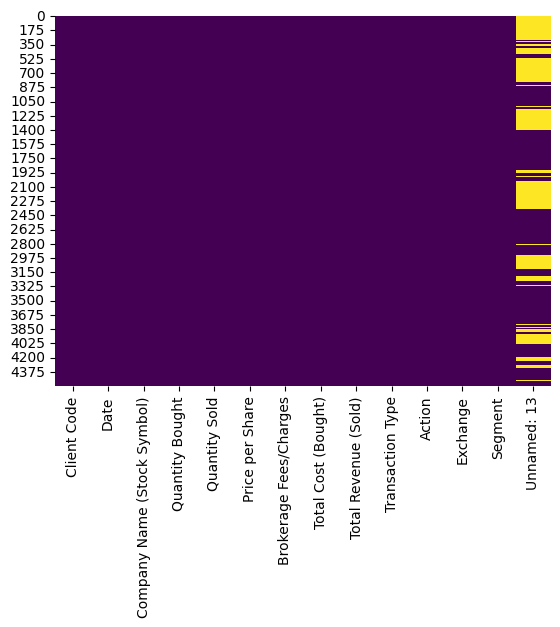

In [249]:
sns.heatmap(trade_data.isnull(),cbar=False,cmap='viridis')

In [250]:
# dropping the last 'unnamed 13' column
trade_data.drop('Unnamed: 13', axis=1, inplace=True)

In [251]:
trade_data.head()

,Client Code,Date,Company Name (Stock Symbol),Quantity Bought,Quantity Sold,Price per Share,Brokerage Fees/Charges,Total Cost (Bought),Total Revenue (Sold),Transaction Type,Action,Exchange,Segment
0,Client1,12/4/2023,VEDL,5,5,242.2,0,1211,1211,DELIVERY,BUY,NSE,CASH
1,Client1,12/4/2023,GAIL,10,10,142.1,0,1421,1421,DELIVERY,BUY,NSE,CASH
2,Client1,12/4/2023,RTNPOWER,50,50,8.84,0,442,442,DELIVERY,BUY,BSE,CASH
3,Client1,12/4/2023,TATAMOTORS,4,4,706.825,0,2827.3,2827.3,DELIVERY,BUY,NSE,CASH
4,Client1,12/4/2023,INDUSINDBK,55,55,1513.626363,0,83249.45,83249.45,DELIVERY,SELL,BSE,CASH


In [253]:
corr_matrix_app_clicks = app_clicks[['Distinct Screen Clicks', 'Total Clicks',
       'Advisor', 'Baskets', 'Chatbot', 'Flexi Loan', 'Fund Transfer', 'Login',
       'Market', 'MF Order', 'MF', 'NCR', 'News', 'Options', 'Other Products',
       'Place Order', 'Portfolio', 'Recommendation', 'Reports', 'Search',
       'Stock SIP', 'Wallet', 'Watchlist']].corr()

<Axes: >

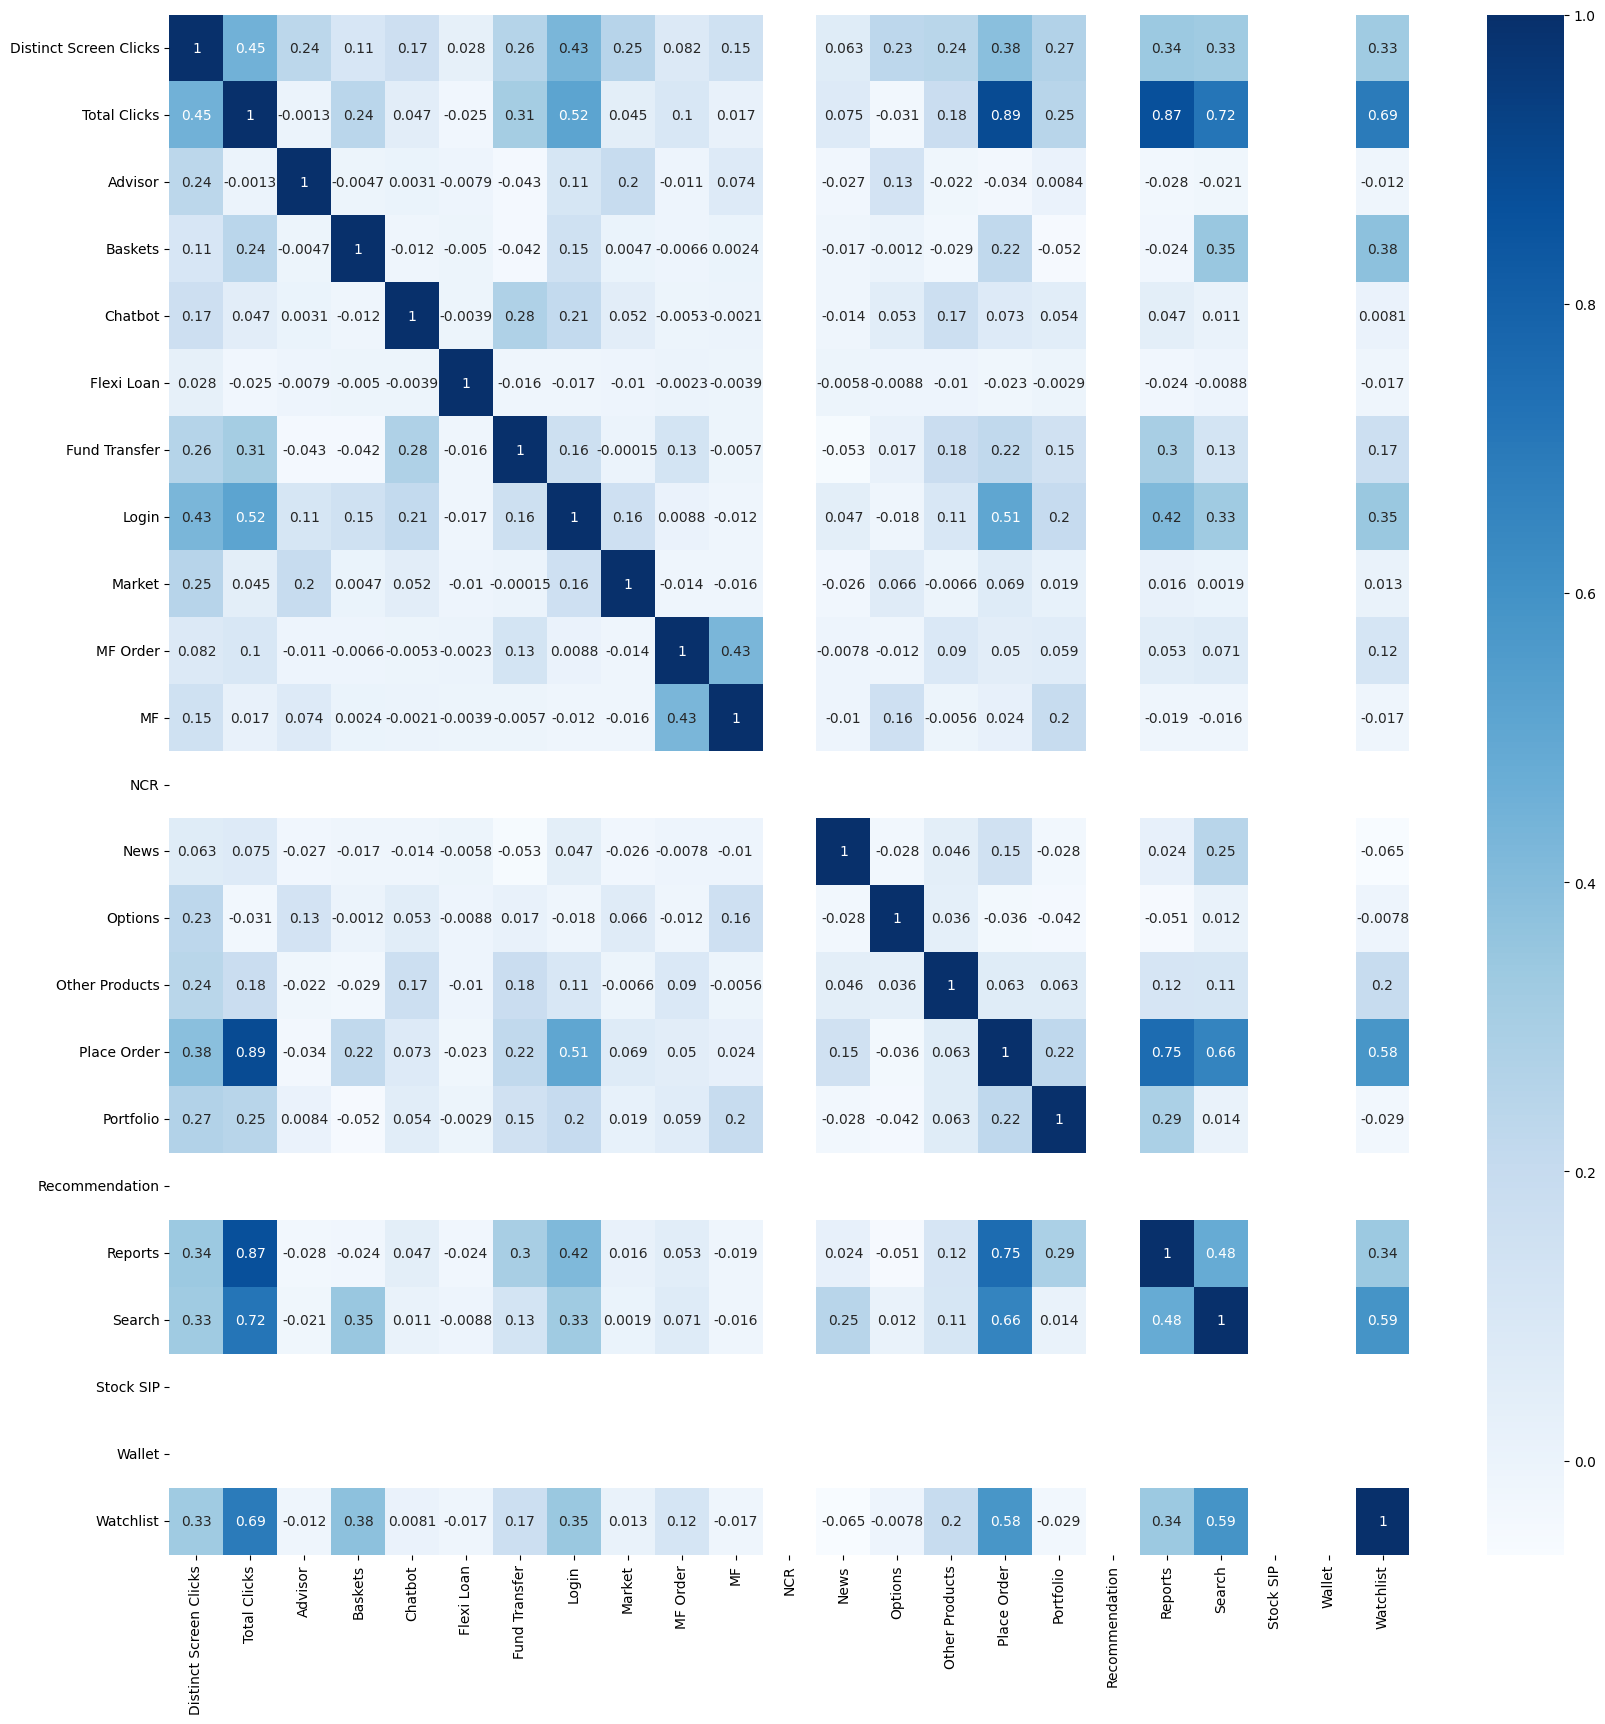

In [254]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix_app_clicks, cbar=True, annot=True, cmap='Blues')

In [255]:
app_clicks.columns

Index(['Client Code', 'Date', 'Distinct Screen Clicks', 'Total Clicks',
       'Advisor', 'Baskets', 'Chatbot', 'Flexi Loan', 'Fund Transfer', 'Login',
       'Market', 'MF Order', 'MF', 'NCR', 'News', 'Options', 'Other Products',
       'Place Order', 'Portfolio', 'Recommendation', 'Reports', 'Search',
       'Stock SIP', 'Wallet', 'Watchlist'],
      dtype='object')

In [256]:
app_clicks['Date'].unique()

array(['12/15/2023', '12/14/2023', '12/13/2023', '12/12/2023',
       '12/11/2023', '12/10/2023', '12/9/2023', '12/7/2023', '12/6/2023',
       '12/5/2023', '12/4/2023', '12/3/2023', '12/2/2023', '12/1/2023'],
      dtype=object)

In [257]:
trade_data['Date'].unique()

array(['12/4/2023', '12/5/2023', '12/7/2023', '12/6/2023', '12/8/2023',
       '12/11/2023', '12/12/2023', '12/13/2023', '12/14/2023',
       '12/15/2023', 'sauda_date'], dtype=object)

In [258]:
len(app_clicks['Date'].unique()), len(trade_data['Date'].unique())

(14, 11)

In [259]:
app_clicks['Client Code'].unique(), trade_data['Client Code'].unique()

(array(['Client8', 'Client46', 'Client48', 'Client31', 'Client37',
        'Client7', 'Client15', 'Client22', 'Client32', 'Client49',
        'Client38', 'Client12', 'Client28', 'Client6', 'Client16',
        'Client19', 'Client47', 'Client9', 'Client30', 'Client36',
        'Client50', 'Client25', 'Client45', 'Client41', 'Client10',
        'Client39', 'Client11', 'Client5', 'Client13', 'Client4',
        'Client40', 'Client14', 'Client24', 'Client18', 'Client34',
        'Client26', 'Client29', 'Client42', 'Client43', 'Client1',
        'Client23', 'Client20', 'Client27', 'Client21', 'Client35',
        'Client33', 'Client17', 'Client3', 'Client44', 'Client2'],
       dtype=object),
 array(['Client1', 'Client10', 'Client11', 'Client12', 'Client13',
        'Client14', 'Client15', 'Client16', 'Client17', 'Client18',
        'Client19', 'Client2', 'Client20', 'Client21', 'Client22',
        'Client23', 'Client24', 'Client25', 'Client26', 'Client27',
        'Client28', 'Client29', 'Cli

In [260]:
len(app_clicks['Client Code'].unique()), len(trade_data['Client Code'].unique())

(50, 51)

In [261]:
trade_data[trade_data['Client Code'] == 'clientcode']

,Client Code,Date,Company Name (Stock Symbol),Quantity Bought,Quantity Sold,Price per Share,Brokerage Fees/Charges,Total Cost (Bought),Total Revenue (Sold),Transaction Type,Action,Exchange,Segment
4546,clientcode,sauda_date,symbol,tradequantity,tradelot,tradeprice,netrate_with_all_charges,volume,volume_marketrate,exchangetradetype,transactiontype,exchange,revenuetype


In [262]:
trade_data.shape

(4547, 13)

In [263]:
new_trade_data = trade_data[trade_data['Client Code'] != 'clientcode']

In [264]:
new_trade_data.shape

(4546, 13)

In [265]:
new_trade_data['Date'].unique()

array(['12/4/2023', '12/5/2023', '12/7/2023', '12/6/2023', '12/8/2023',
       '12/11/2023', '12/12/2023', '12/13/2023', '12/14/2023',
       '12/15/2023'], dtype=object)

In [266]:
app_clicks['Date'].unique()

array(['12/15/2023', '12/14/2023', '12/13/2023', '12/12/2023',
       '12/11/2023', '12/10/2023', '12/9/2023', '12/7/2023', '12/6/2023',
       '12/5/2023', '12/4/2023', '12/3/2023', '12/2/2023', '12/1/2023'],
      dtype=object)

In [267]:
diff_dates = list(set(list(app_clicks['Date'].unique())) - set(list(trade_data['Date'].unique())))

In [268]:
diff_dates

['12/3/2023', '12/10/2023', '12/2/2023', '12/9/2023', '12/1/2023']

In [269]:
missing_date = app_clicks[app_clicks['Date'].isin(diff_dates)]

In [270]:
missing_date

,Client Code,Date,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist
234,Client5,12/10/2023,5,15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,0,7,0,0,0,0
235,Client11,12/10/2023,8,39,0,0,0,0,0,2,0,0,0,0,0,0,0,10,5,0,5,0,0,0,6
236,Client50,12/10/2023,8,32,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,1,14,0,0,7
237,Client32,12/10/2023,6,21,0,0,0,0,0,2,0,0,0,0,0,0,0,0,4,0,11,0,0,0,1
238,Client14,12/10/2023,6,30,0,0,0,0,0,3,0,0,0,0,0,0,0,0,4,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Client32,12/1/2023,9,1641,0,0,0,0,0,3,0,0,0,0,0,0,0,309,33,0,1199,28,0,0,2
591,Client30,12/1/2023,11,118,1,0,0,0,0,1,0,0,0,0,0,2,0,20,5,0,21,5,0,0,15
592,Client28,12/1/2023,10,126,0,0,0,1,0,3,0,0,0,0,0,0,0,11,14,0,26,16,0,0,10
593,Client19,12/1/2023,7,574,0,0,0,0,0,6,0,0,0,0,0,0,0,49,0,0,120,0,0,0,70


In [271]:
app_clicks.shape

(595, 25)

In [272]:
data = new_trade_data[['Client Code', 'Quantity Bought', 'Quantity Sold']]

In [273]:
data

,Client Code,Quantity Bought,Quantity Sold
0,Client1,5,5
1,Client1,10,10
2,Client1,50,50
3,Client1,4,4
4,Client1,55,55
...,...,...,...
4541,Client9,500,10
4542,Client9,500,10
4543,Client9,50,1
4544,Client9,500,10


In [274]:
app_clicks.head()

,Client Code,Date,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist
0,Client8,12/15/2023,8,145,0,0,0,0,0,5,0,0,0,0,0,0,0,0,47,0,28,3,0,0,15
1,Client46,12/15/2023,8,48,0,0,0,0,0,1,0,0,0,0,0,0,0,2,6,0,1,1,0,0,0
2,Client48,12/15/2023,5,42,0,0,0,0,0,4,0,0,0,0,0,0,0,0,7,0,17,0,0,0,0
3,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491
4,Client37,12/15/2023,8,559,0,0,0,0,0,3,0,0,0,0,0,0,0,76,5,0,318,36,0,0,0


In [275]:
new_trade_data.head()

,Client Code,Date,Company Name (Stock Symbol),Quantity Bought,Quantity Sold,Price per Share,Brokerage Fees/Charges,Total Cost (Bought),Total Revenue (Sold),Transaction Type,Action,Exchange,Segment
0,Client1,12/4/2023,VEDL,5,5,242.2,0,1211,1211,DELIVERY,BUY,NSE,CASH
1,Client1,12/4/2023,GAIL,10,10,142.1,0,1421,1421,DELIVERY,BUY,NSE,CASH
2,Client1,12/4/2023,RTNPOWER,50,50,8.84,0,442,442,DELIVERY,BUY,BSE,CASH
3,Client1,12/4/2023,TATAMOTORS,4,4,706.825,0,2827.3,2827.3,DELIVERY,BUY,NSE,CASH
4,Client1,12/4/2023,INDUSINDBK,55,55,1513.626363,0,83249.45,83249.45,DELIVERY,SELL,BSE,CASH


In [276]:
data = pd.merge(app_clicks, new_trade_data[['Client Code', 'Date', 'Quantity Bought', 'Quantity Sold']], on=['Client Code', 'Date'], how='left')

In [277]:
data.head()

,Client Code,Date,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist,Quantity Bought,Quantity Sold
0,Client8,12/15/2023,8,145,0,0,0,0,0,5,0,0,0,0,0,0,0,0,47,0,28,3,0,0,15,NaN,NaN
1,Client46,12/15/2023,8,48,0,0,0,0,0,1,0,0,0,0,0,0,0,2,6,0,1,1,0,0,0,NaN,NaN
2,Client48,12/15/2023,5,42,0,0,0,0,0,4,0,0,0,0,0,0,0,0,7,0,17,0,0,0,0,NaN,NaN
3,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,11,11
4,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,2,2


In [278]:
data.isnull().sum()

Client Code                 0
Date                        0
Distinct Screen Clicks      0
Total Clicks                0
Advisor                     0
Baskets                     0
Chatbot                     0
Flexi Loan                  0
Fund Transfer               0
Login                       0
Market                      0
MF Order                    0
MF                          0
NCR                         0
News                        0
Options                     0
Other Products              0
Place Order                 0
Portfolio                   0
Recommendation              0
Reports                     0
Search                      0
Stock SIP                   0
Wallet                      0
Watchlist                   0
Quantity Bought           258
Quantity Sold             258
dtype: int64

In [91]:
data['Final Activity'] = data['Quantity Bought'] + data['Quantity Sold']
data.drop(columns=['Quantity Bought', 'Quantity Sold'], inplace=True)

In [92]:
data.head()

,Client Code,Date,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist,Final Activity
0,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,1111
1,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,22
2,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,44
3,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,1111
4,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,33


In [98]:
data.shape

(4418, 27)

In [94]:
data.describe()

,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist
count,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.0,4160.000000,4160.00000,4160.000000,4160.000000,4160.000000,4160.0,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4160.0,4160.000000,4160.000000,4160.0,4160.0,4160.000000
mean,9.562500,1323.020673,0.718750,15.390144,0.007692,0.0,3.606250,5.26899,0.381010,0.018029,0.742308,0.0,0.754327,0.191106,0.335817,238.386058,22.188221,0.0,463.293750,79.082692,0.0,0.0,182.025000
std,1.500961,796.863370,3.621319,61.845284,0.111552,0.0,7.076184,2.64407,1.592775,0.171024,6.698641,0.0,3.457603,0.804393,1.172321,158.565132,38.787271,0.0,400.466994,69.252474,0.0,0.0,244.935077
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
25%,9.000000,709.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,105.000000,2.000000,0.0,194.000000,22.000000,0.0,0.0,0.000000
50%,9.000000,1265.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,214.000000,7.000000,0.0,397.000000,71.000000,0.0,0.0,51.000000
75%,10.000000,1890.000000,0.000000,0.000000,0.000000,0.0,4.000000,6.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,343.000000,28.000000,0.0,589.000000,108.000000,0.0,0.0,338.000000
max,15.000000,3398.000000,70.000000,456.000000,2.000000,0.0,33.000000,21.00000,16.000000,2.000000,81.000000,0.0,23.000000,12.000000,10.000000,889.000000,413.000000,0.0,2274.000000,390.000000,0.0,0.0,829.000000


In [279]:
new_trade_data['Quantity Bought'] = new_trade_data['Quantity Bought'].astype(int)
new_trade_data['Quantity Sold'] = new_trade_data['Quantity Sold'].astype(int)

/var/folders/kb/9kv093h52vgbh_00nbbwmtfw0000gp/T/ipykernel_7703/1428434651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_trade_data['Quantity Bought'] = new_trade_data['Quantity Bought'].astype(int)
/var/folders/kb/9kv093h52vgbh_00nbbwmtfw0000gp/T/ipykernel_7703/1428434651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_trade_data['Quantity Sold'] = new_trade_data['Quantity Sold'].astype(int)


In [280]:
aggregated_data = new_trade_data.groupby(['Client Code', 'Date']).agg({
    'Quantity Bought': 'sum',
    'Quantity Sold': 'sum'
}).reset_index()

In [281]:
aggregated_data['Total Acitivity'] = aggregated_data['Quantity Bought'] + aggregated_data['Quantity Sold']
aggregated_data.drop(columns=['Quantity Bought', 'Quantity Sold'], inplace=True)

In [282]:
aggregated_data.head()

,Client Code,Date,Total Acitivity
0,Client1,12/11/2023,110
1,Client1,12/12/2023,14
2,Client1,12/13/2023,6
3,Client1,12/14/2023,154
4,Client1,12/15/2023,26


In [283]:
new_trade_data[['Quantity Bought', 'Quantity Sold']].describe()

,Quantity Bought,Quantity Sold
count,4546.000000,4546.000000
mean,1531.154641,98.836120
std,5579.798847,561.742798
min,1.000000,1.000000
25%,15.000000,1.000000
50%,75.000000,4.000000
75%,500.000000,17.000000
max,100000.000000,20000.000000


In [284]:
new_trade_data[new_trade_data['Client Code'] == 'Client1']

,Client Code,Date,Company Name (Stock Symbol),Quantity Bought,Quantity Sold,Price per Share,Brokerage Fees/Charges,Total Cost (Bought),Total Revenue (Sold),Transaction Type,Action,Exchange,Segment
0,Client1,12/4/2023,VEDL,5,5,242.2,0,1211,1211,DELIVERY,BUY,NSE,CASH
1,Client1,12/4/2023,GAIL,10,10,142.1,0,1421,1421,DELIVERY,BUY,NSE,CASH
2,Client1,12/4/2023,RTNPOWER,50,50,8.84,0,442,442,DELIVERY,BUY,BSE,CASH
3,Client1,12/4/2023,TATAMOTORS,4,4,706.825,0,2827.3,2827.3,DELIVERY,BUY,NSE,CASH
4,Client1,12/4/2023,INDUSINDBK,55,55,1513.626363,0,83249.45,83249.45,DELIVERY,SELL,BSE,CASH
5,Client1,12/4/2023,ASHOKLEY,20,20,175.6,0,3512,3512,DELIVERY,BUY,NSE,CASH
6,Client1,12/4/2023,JISLJALEQS,50,50,69.96,0,3498,3498,DELIVERY,BUY,BSE,CASH
7,Client1,12/4/2023,UNOMINDA,10,10,656.8,0,6568,6568,DELIVERY,BUY,NSE,CASH
8,Client1,12/5/2023,PATELENG,30,30,54.05,0,1621.5,1621.5,DELIVERY,BUY,NSE,CASH
9,Client1,12/5/2023,OLECTRA,10,10,1196,0,11960,11960,DELIVERY,BUY,NSE,CASH


In [285]:
data = pd.merge(app_clicks, aggregated_data, on=['Client Code', 'Date'], how='inner')

In [286]:
data.head()

,Client Code,Date,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist,Total Acitivity
0,Client31,12/15/2023,13,1659,3,223,0,0,2,6,4,0,0,0,0,1,0,343,0,0,53,88,0,0,491,1052
1,Client37,12/15/2023,8,559,0,0,0,0,0,3,0,0,0,0,0,0,0,76,5,0,318,36,0,0,0,604
2,Client32,12/15/2023,10,442,0,0,0,0,0,5,0,0,0,0,0,0,0,64,49,0,270,6,0,0,6,501
3,Client38,12/15/2023,8,168,0,0,0,0,0,2,0,0,0,0,0,0,1,25,0,0,79,0,0,0,16,255
4,Client12,12/15/2023,12,566,70,0,0,0,0,6,2,0,0,0,0,2,0,37,9,0,106,16,0,0,66,12


In [287]:
data[data['Client Code'] == 'Client10']

,Client Code,Date,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist,Total Acitivity
14,Client10,12/15/2023,10,2344,0,0,0,0,7,6,0,0,0,0,0,0,0,551,27,0,640,86,0,0,829,1694
54,Client10,12/14/2023,9,1998,0,0,0,0,0,7,0,0,0,0,0,0,0,506,28,0,500,81,0,0,624,4106
88,Client10,12/13/2023,10,1814,0,0,0,0,7,5,0,0,0,0,0,0,0,376,32,0,497,73,0,0,654,2388
102,Client10,12/12/2023,10,1607,0,0,0,0,7,8,0,0,0,0,0,0,0,392,42,0,375,56,0,0,589,828
144,Client10,12/11/2023,10,2035,0,0,0,0,2,6,0,0,0,0,0,0,0,526,24,0,542,85,0,0,678,4664
198,Client10,12/7/2023,9,1908,0,0,0,0,0,7,0,0,0,0,0,0,0,558,22,0,455,62,0,0,613,2458
210,Client10,12/6/2023,10,2509,0,3,0,0,0,10,0,0,0,0,0,0,0,606,23,0,736,104,0,0,825,4920
273,Client10,12/5/2023,9,1890,0,0,0,0,0,6,0,0,0,0,0,0,0,554,16,0,466,70,0,0,582,3306
293,Client10,12/4/2023,9,2038,0,0,0,0,0,6,0,0,0,0,0,0,0,611,15,0,514,70,0,0,635,4852


In [157]:
data = data[['Distinct Screen Clicks', 'Total Clicks', 'Fund Transfer', 'Login', 'Place Order', 'Portfolio', 'Search', 'Watchlist', 'Total Acitivity']]

In [158]:
data.head()

,Distinct Screen Clicks,Total Clicks,Fund Transfer,Login,Place Order,Portfolio,Search,Watchlist,Total Acitivity
0,13,1659,2,6,343,0,88,491,1052
1,8,559,0,3,76,5,36,0,604
2,10,442,0,5,64,49,6,6,501
3,8,168,0,2,25,0,0,16,255
4,12,566,0,6,37,9,16,66,12


In [288]:
data.shape

(337, 26)

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [290]:
scaler = MinMaxScaler()

In [291]:
X = data.drop(['Total Acitivity', 'Client Code', 'Date'], axis=1)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
Y = data[['Total Acitivity']]
# Y = pd.DataFrame(scaler.fit_transform(Y), columns=Y.columns)

In [292]:
X

,Distinct Screen Clicks,Total Clicks,Advisor,Baskets,Chatbot,Flexi Loan,Fund Transfer,Login,Market,MF Order,MF,NCR,News,Options,Other Products,Place Order,Portfolio,Recommendation,Reports,Search,Stock SIP,Wallet,Watchlist
0,0.857143,0.488078,0.042857,0.489035,0.0,0.0,0.060606,0.25,0.250,0.0,0.0,0.0,0.0,0.083333,0.0,0.385827,0.000000,0.0,0.023307,0.225641,0.0,0.0,0.592280
1,0.500000,0.164263,0.000000,0.000000,0.0,0.0,0.000000,0.10,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.085489,0.012107,0.0,0.139842,0.092308,0.0,0.0,0.000000
2,0.642857,0.129820,0.000000,0.000000,0.0,0.0,0.000000,0.20,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.071991,0.118644,0.0,0.118734,0.015385,0.0,0.0,0.007238
3,0.500000,0.049161,0.000000,0.000000,0.0,0.0,0.000000,0.05,0.000,0.0,0.0,0.0,0.0,0.000000,0.1,0.028121,0.000000,0.0,0.034741,0.000000,0.0,0.0,0.019300
4,0.785714,0.166323,1.000000,0.000000,0.0,0.0,0.000000,0.25,0.125,0.0,0.0,0.0,0.0,0.166667,0.0,0.041620,0.021792,0.0,0.046614,0.041026,0.0,0.0,0.079614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.642857,0.073594,0.042857,0.000000,0.0,0.0,0.000000,0.15,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.022497,0.070218,0.0,0.020229,0.020513,0.0,0.0,0.002413
333,0.714286,0.379452,0.057143,0.000000,0.0,0.0,0.545455,0.20,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.215973,0.186441,0.0,0.220317,0.012821,0.0,0.0,0.211098
334,0.500000,0.503680,0.000000,0.000000,0.0,0.0,0.000000,1.00,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.508436,0.000000,0.0,0.186016,0.220513,0.0,0.0,0.004825
335,0.428571,0.007359,0.000000,0.000000,0.0,0.0,0.000000,0.05,0.000,0.0,0.0,0.0,0.0,0.000000,0.0,0.007874,0.016949,0.0,0.000440,0.000000,0.0,0.0,0.000000


In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [294]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((269, 23), (68, 23), (269, 1), (68, 1))

In [295]:
linear_regression = LinearRegression()

In [296]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [297]:
y_pred = linear_regression.predict(X_test)

In [298]:
y_pred

array([[  37498.46726524],
       [ -18037.46056164],
       [   3184.92523338],
       [  -5747.63621374],
       [ -10727.89056213],
       [  45219.09394995],
       [ -12427.62573407],
       [ -25291.41033562],
       [   5479.99212347],
       [ 152853.94997644],
       [  27008.94612795],
       [-163195.97758243],
       [   2665.62494306],
       [ -18990.86297674],
       [  24067.03447366],
       [  87881.38208582],
       [  71345.54054588],
       [  35744.83361718],
       [  44925.49841988],
       [  75502.62467051],
       [  25999.6084387 ],
       [   2543.84244478],
       [ 418706.89468853],
       [   6764.19165118],
       [ 136936.00702207],
       [  23864.91809787],
       [   3988.51164688],
       [-375318.60959909],
       [   6749.47632245],
       [ -61807.42490394],
       [  31035.0291774 ],
       [  45498.0411178 ],
       [   9398.23584187],
       [  22913.73441664],
       [ -24750.24906198],
       [  -6963.34154809],
       [  73831.67080462],
 

In [299]:
from sklearn.metrics import mean_squared_error, r2_score

In [300]:
mse = mean_squared_error(y_test, y_pred)
mse

21805578446.423653

In [301]:
r2 = r2_score(y_test, y_pred)
r2

-51.810606710352296